# Hate speech detection

### Importing libraries

In [1]:
import pandas as pd
import numpy as np

### Reading the dataset

In [2]:
dataset = pd.read_csv('train.csv')

### visualizing the dataset

In [3]:
dataset

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
dataset.info

<bound method DataFrame.info of        count  hate_speech_count  offensive_language_count  neither_count  \
0          3                  0                         0              3   
1          3                  0                         3              0   
2          3                  0                         3              0   
3          3                  0                         2              1   
4          6                  0                         6              0   
...      ...                ...                       ...            ...   
24778      3                  0                         2              1   
24779      3                  0                         1              2   
24780      3                  0                         3              0   
24781      6                  0                         6              0   
24782      3                  0                         0              3   

       class                                           

### Finding the Null values

In [5]:
dataset.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64

### Creating the labels for the class

In [6]:
dataset["labels"] = dataset["class"].map({0 : "Hate Speech",
                                    1 : "offensive language",
                                    2 : "No hate or offensive language"})

In [7]:
dataset

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,labels
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language
...,...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,offensive language
24781,6,0,6,0,1,youu got wild bitches tellin you lies,offensive language


### Reducing the data to 2 columns ("tweet" , "labels)

In [8]:
data = dataset[["tweet","labels"]]

In [9]:
data


,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language
24779,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive language
24781,youu got wild bitches tellin you lies,offensive language


### Importing the natural language tool kit, regular expressions,string

In [10]:
import nltk
import re 
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Yaswanth reddy
[nltk_data]     lakku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

In [12]:
# Reducing the noise by adding "rt" to stopwords
stopwords.add('rt')
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [13]:
stemmer = nltk.SnowballStemmer("english")

### Cleaning the data 

In [14]:
def clean_data(text):
    text = str(text).lower()
    text = re.sub('https?://\S|www.\.S+','',text)
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]' %re.escape(string.punctuation), '',text)
    text = re.sub('\n', '',text)
    text = re.sub('\w*\d\w','',text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

### Testing the clean_data function

In [15]:
sample = "Let's unite and kill all the people who are protesting against the government"
sample = clean_data(sample)
sample

'let unit kill peopl protest govern'

In [16]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language
24779,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive language
24781,youu got wild bitches tellin you lies,offensive language


### Cleaning the tweet column by using the clean_data function

In [17]:
data['tweet'] = data['tweet'].apply(clean_data)

C:\Users\Yaswanth reddy lakku\AppData\Local\Temp\ipykernel_2280\3370867953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(clean_data)


In [18]:
data

,tweet,labels
0,mayasolov woman shouldnt complain clean hous ...,No hate or offensive language
1,boy dat coldtyga dwn bad cuffin dat hoe place,offensive language
2,urkindofbrand dawg ife ever fuck bitch start ...,offensive language
3,cganderson vivabas look like tranni,offensive language
4,shenikarobert shit hear might true might fake...,offensive language
...,...,...
24778,yous muthafin lie ifeask earl coreyemanuel rig...,offensive language
24779,youv gone broke wrong heart babi drove redneck...,No hate or offensive language
24780,young buck wanna eat dat nigguh like aint fuck...,offensive language
24781,youu got wild bitch tellin lie,offensive language


### Dividing the data into dependent(y) and independent(x) values

In [19]:
X = np.array(data["tweet"])
y = np.array(data["labels"])

In [20]:
X

array([' mayasolov woman shouldnt complain clean hous amp man alway take trash',
       '  boy dat coldtyga dwn bad cuffin dat hoe place',
       ' urkindofbrand dawg ife ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll yebvnzb'],
      dtype=object)

In [21]:
y

array(['No hate or offensive language', 'offensive language',
       'offensive language', ..., 'offensive language',
       'offensive language', 'No hate or offensive language'],
      dtype=object)

### Importing the machine learning libraries

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [23]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [24]:
X

<24783x29448 sparse matrix of type '<class 'numpy.int64'>'
	with 196151 stored elements in Compressed Sparse Row format>

### Dividing the data to train and test

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.33, random_state=42)

In [46]:
from sklearn.tree import DecisionTreeClassifier

### Training the model on X_train and y_train

In [47]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

### Predecting the y_pred on X_test values

In [48]:
y_pred = dt.predict(X_test)

In [49]:
y_pred

array(['offensive language', 'offensive language', 'offensive language',
       ..., 'No hate or offensive language', 'offensive language',
       'offensive language'], dtype=object)

In [50]:
y_test

array(['offensive language', 'offensive language',
       'No hate or offensive language', ..., 'offensive language',
       'offensive language', 'offensive language'], dtype=object)

### Evaluating the model using confusion matrix and accuracy_score

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [52]:
cm = confusion_matrix(y_test,y_pred)

In [53]:
ac_score = accuracy_score(y_test,y_pred)

In [54]:
cm

array([[ 162,   33,  270],
       [  41, 1085,  253],
       [ 267,  237, 5831]], dtype=int64)

In [55]:
Report = {'Classification Algorithm': ['Decision Tree'],
          'Accuracy Score': [ac_score] 
         }
Report = pd.DataFrame(Report)
Report

,Classification Algorithm,Accuracy Score
0,Decision Tree,0.865387


In [56]:
import seaborn as sns

<Axes: >

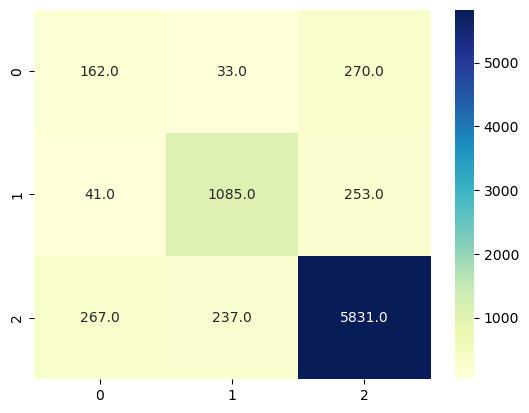

In [57]:
sns.heatmap(cm, annot = True, fmt =".1f", cmap = "YlGnBu")

# Report
### Aa we  see in the Accuracy score of nearly 87% our model is performing well 